In [66]:

import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx
/kaggle/input/car-price-prediction/CarPrice_Assignment.csv


In [67]:
df=pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')

In [68]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [69]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [70]:
df.shape

(205, 26)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [72]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [73]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [74]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [75]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [76]:
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [77]:
df['cylindernumber']=df['cylindernumber'].map({'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12})

In [78]:
df['cylindernumber'].dtype

dtype('int64')

In [79]:
df['enginetype']=df['enginetype'].map({'ohc':1,'ohcf':2,'ohcv':3,'dohc':4,'l':5,'rotar':6,'dohcv':7})

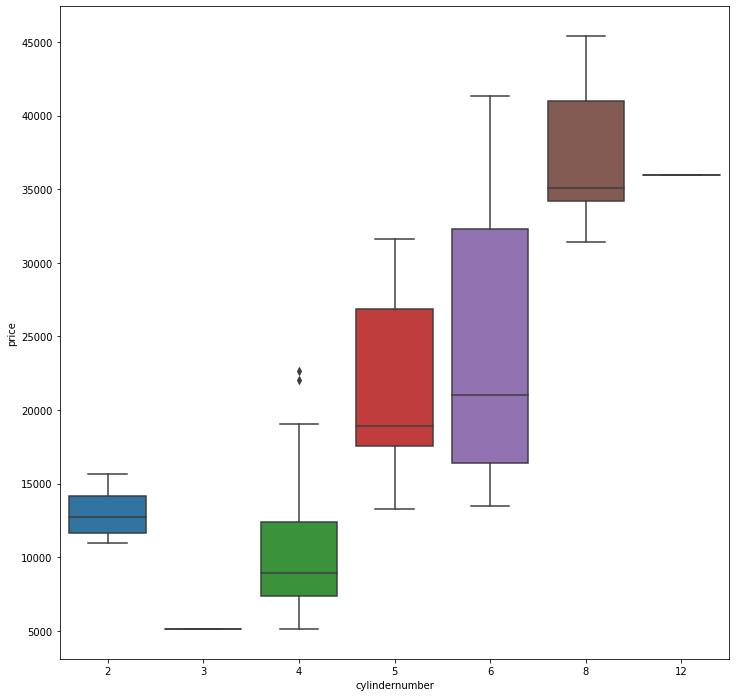

In [80]:
sns.boxplot(data=df,x='cylindernumber',y='price')

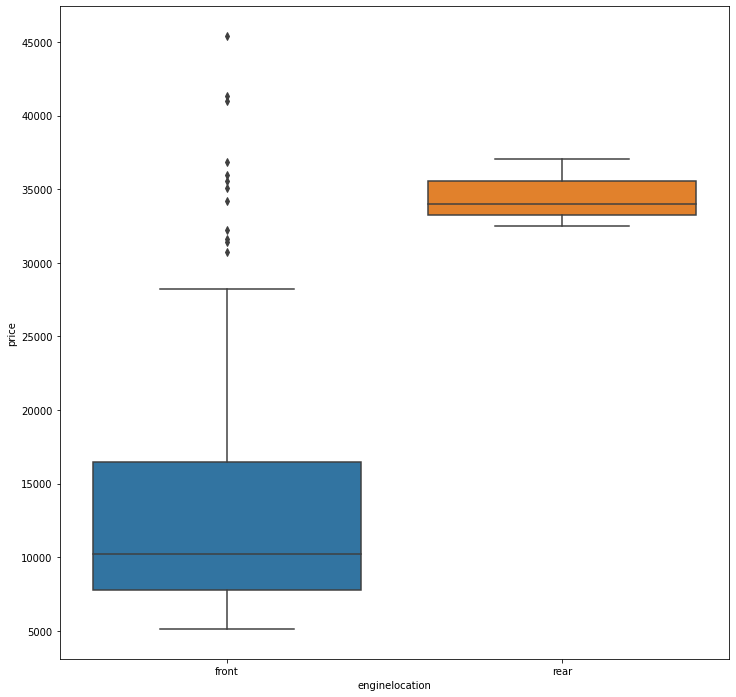

In [81]:
sns.boxplot(data=df,x='enginelocation',y='price')

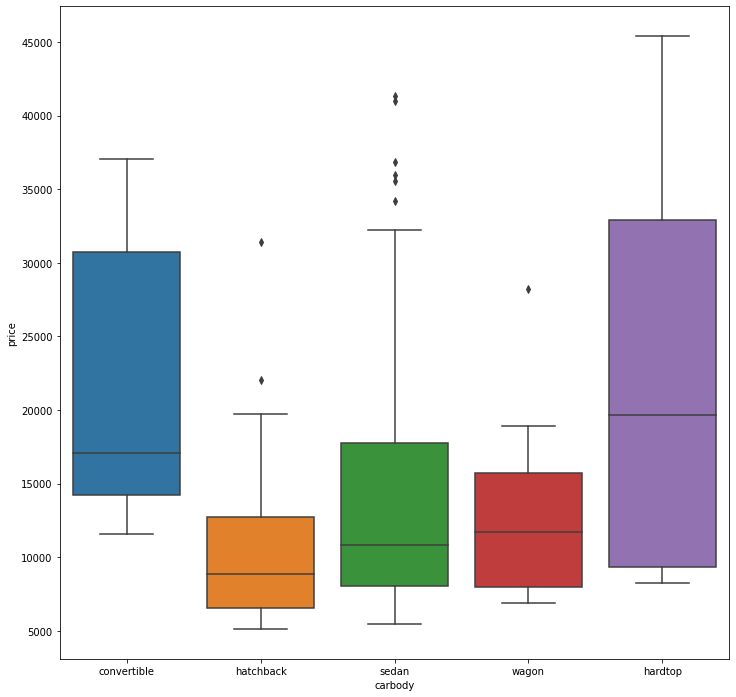

In [82]:
sns.boxplot(data=df,x='carbody',y='price')

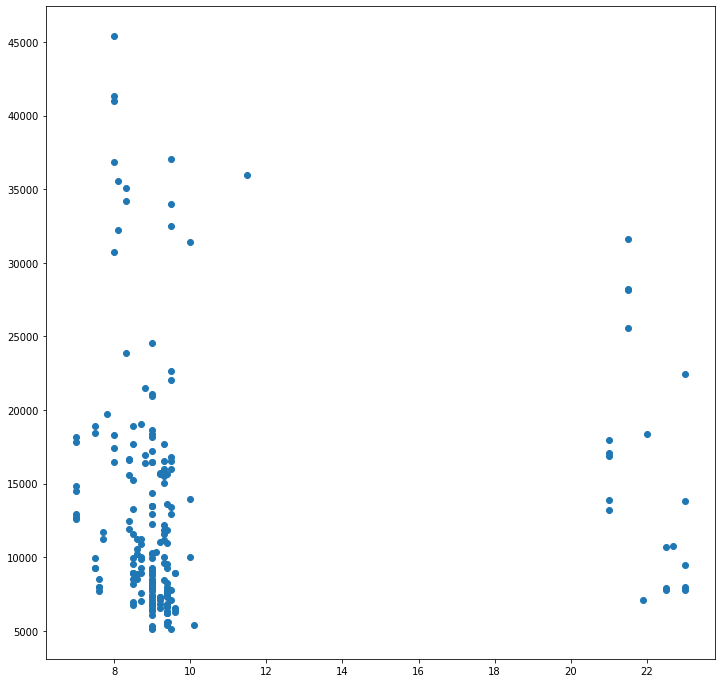

In [83]:
plt.scatter(x='compressionratio',y='price',data=df)

In [84]:
df.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


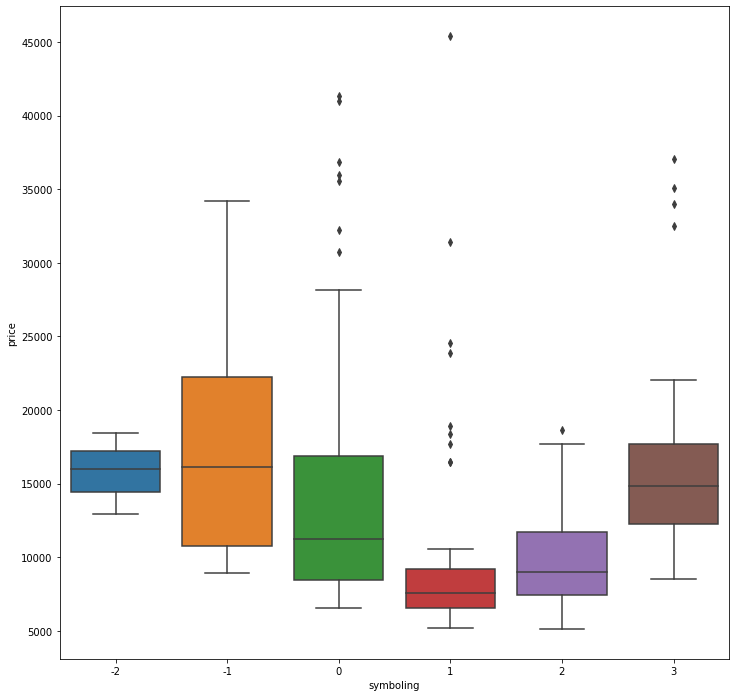

In [85]:
sns.boxplot(data=df,x='symboling',y='price')

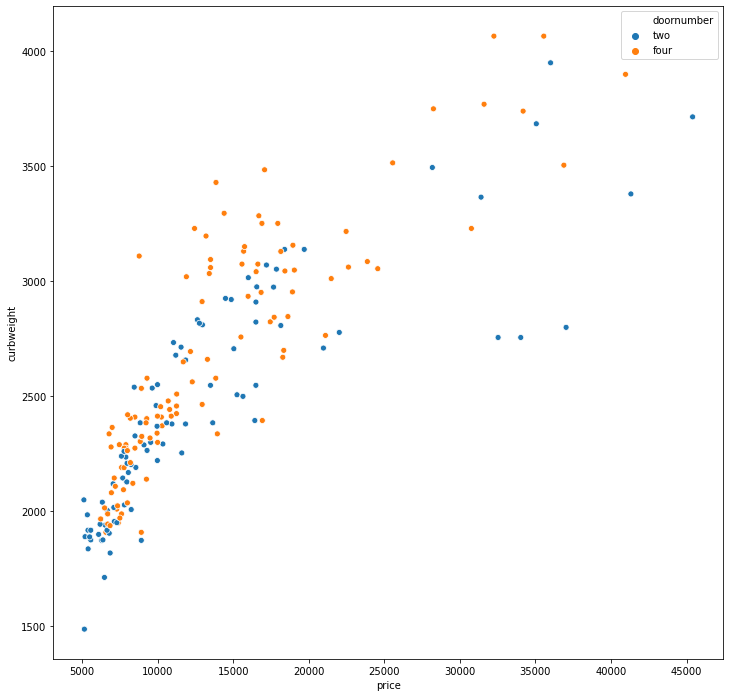

In [86]:
sns.scatterplot(x='price',y='curbweight',hue='doornumber',data=df)

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [88]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
lr.score(X_train,y_train)

0.9229863285983396

In [90]:
lr_pred=lr.predict(X_test)
print('MSE:',mean_squared_error(lr_pred,y_test))
print('MAE:',mean_absolute_error(lr_pred,y_test))
print('r2_score:',r2_score(lr_pred,y_test))

MSE: 9113987.102335952
MAE: 2340.9876107846812
r2_score: 0.8393832388682398


In [91]:
prediction=pd.DataFrame({'Actual':y_test,'Predicted':lr_pred})

In [92]:
prediction.head(10)

,Actual,Predicted
5,15250.000,15244.523476
66,18344.000,15470.584963
6,17710.000,20357.084522
174,10698.000,11022.253463
54,7395.000,6342.132616
111,15580.000,19955.418687
145,11259.000,12204.990157
169,9989.000,12661.458180
117,18150.000,19368.042452
9,17859.167,20351.731042


In [93]:
lr.coef_

array([ 2.22190481e+02,  1.35435080e+02, -1.14018504e+02,  8.90667261e+02,
        2.10713790e+02,  5.66063538e+00, -1.02636234e+03, -5.55573069e+02,
        9.68812012e+01, -4.91081769e+03, -5.00024779e+03, -1.40997326e+03,
        4.40244227e+01,  1.43276388e+00,  1.45936135e+02,  6.46014117e+03,
       -6.46014117e+03,  4.75991172e+02, -4.75991172e+02, -3.59933499e+02,
        3.59933499e+02,  2.52035662e+03, -1.39742117e+03, -4.91412353e+02,
        8.13931047e+02, -1.44545415e+03, -5.52638581e+02, -5.32194994e+02,
        1.08483358e+03, -6.04793759e+03,  6.04793759e+03, -1.64744062e+03,
       -9.91831793e+02,  2.85430445e+03,  6.46014117e+03,  0.00000000e+00,
       -1.08737031e+03, -3.29810594e+03, -2.28969695e+03])